# Feature Selection

In [3]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [4]:
hotel_rev = pd.read_csv('HotelRevHelpfulness.csv')
print(hotel_rev.shape)
hotel_rev.head()

(486, 25)


,hotelId,aveHelpfulnessRatioUser,stdevHelpfulnessRatioUser,pcReviewsExceedMinHelpfulnessSupport,numReviewsUser,numReviewsHotel,ratingUser,numberSubRatingsUser,subRatingMeanUser,subRatingStdevUser,...,completeness_2,completeness_3,numberTermsEntry,percentageAlphaCharsEntry,fractionUpperCaseCharsEntry,fractionYouVsIEntry,numberTermsSummaryQuote,percentageAlphaCharsSummaryQuote,fractionUpperCaseCharsSummaryQuote,reviewHelpfulness
0,17420,1.000000,0.000000,0.666667,3,16,5,4,4.000000,0.000000,...,0,1,182,0.788474,0.025703,0.500000,6,0.815789,0.096774,1
1,1397,0.772487,0.377321,0.500000,12,233,5,0,0.000000,0.000000,...,0,0,158,0.791888,0.012594,0.500000,1,1.000000,0.083333,1
2,1348,0.715473,0.300437,0.833333,12,302,4,7,3.714286,0.755929,...,0,3,59,0.799639,0.024831,0.333333,4,0.828571,0.034483,0
3,5940,0.521250,0.481675,0.222222,36,6,1,4,1.000000,0.000000,...,0,0,95,0.782212,0.029155,0.500000,2,0.800000,0.062500,0
4,38,0.603175,0.246926,1.000000,2,271,3,0,0.000000,0.000000,...,0,0,43,0.805128,0.028662,0.000000,1,1.000000,0.142857,0


In [5]:
y = hotel_rev.pop('reviewHelpfulness').values
hotel_rev.pop('hotelId')
X = hotel_rev.values
hotel_rev.shape

(486, 23)

## Filter-based Feature Selection
### Feature Scoring - two methods  
1. Chi square statistic
2. Information Gain

In [6]:
chi2_score, pval = chi2(X, y)
chi2_score
# The chi square scores for the 23 features

array([1.17643855e+00, 1.25630861e+00, 2.97935332e+00, 4.99241616e+02,
       2.09687468e+01, 4.63515335e+00, 1.60567118e+01, 2.34205853e+01,
       1.22221503e-01, 2.01609093e-01, 5.11397162e-01, 4.38593706e-02,
       4.29417810e-02, 1.10399662e+01, 7.01736499e+00, 1.50630136e+01,
       1.35095136e+03, 4.73150717e-03, 3.15477433e-03, 1.96131502e+00,
       2.26290946e-01, 5.28034618e-03, 9.95572153e-03])

In [7]:
i_scores = mutual_info_classif(X,y)
i_scores
# The i-gain scores for the 23 features

array([0.02041595, 0.0175219 , 0.02503594, 0.07291124, 0.05543811,
       0.03347905, 0.0035518 , 0.02027123, 0.        , 0.03998221,
       0.09216707, 0.04631164, 0.05975787, 0.01044822, 0.03199479,
       0.        , 0.0358348 , 0.        , 0.        , 0.03580828,
       0.02116299, 0.00581988, 0.00700265])

In [8]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SpearmanrResult(correlation=0.2862812146717796, pvalue=0.1853997322129808)

In [9]:
mi = dict()

for i,j in zip(hotel_rev.columns,i_scores):
    mi[i]=j
    print(i,": ",j)

aveHelpfulnessRatioUser :  0.02041594619895548
stdevHelpfulnessRatioUser :  0.017521895107560193
pcReviewsExceedMinHelpfulnessSupport :  0.025035935384903674
numReviewsUser :  0.07291123731365712
numReviewsHotel :  0.055438114174872766
ratingUser :  0.03347904663474344
numberSubRatingsUser :  0.00355180337569605
subRatingMeanUser :  0.020271232246701576
subRatingStdevUser :  0.0
aveRatingUser :  0.03998220726883406
stdevRatingUser :  0.0921670726574888
aveRatingHotel :  0.04631164047211356
stdevRatingHotel :  0.05975787246087849
completeness_1 :  0.010448220904495376
completeness_2 :  0.031994788013258946
completeness_3 :  0.0
numberTermsEntry :  0.03583479706188197
percentageAlphaCharsEntry :  0.0
fractionUpperCaseCharsEntry :  0.0
fractionYouVsIEntry :  0.03580828329199348
numberTermsSummaryQuote :  0.02116299174664027
percentageAlphaCharsSummaryQuote :  0.005819876625929199
fractionUpperCaseCharsSummaryQuote :  0.00700264989356425


#### Image Segmentation Data

In [10]:
import pandas as pd
seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [11]:
y = seg_data.pop('Class').values
X = seg_data.values

### Feature Selection

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB()

In [13]:
mi = dict()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=1/2)
i_scores = mutual_info_classif(X_train, y_train)

for i,j in zip(seg_data.columns,i_scores):
    mi[i]=j
 
df = pd.DataFrame.from_dict(mi,orient='index',columns=['I-Gain'])
df.sort_values(by=['I-Gain'],ascending=False,inplace=True)
df.head(10)

,I-Gain
RAWRED-MEAN,1.256537
INTENSITY-MEAN,1.154883
HUE-MEAN,1.154083
RAWGREEN-MEAN,1.128537
VALUE-MEAN,1.107094
RAWBLUE-MEAN,1.101926
REGION-CENTROID-ROW,0.970093
SATURATION-MEAN,0.953886
EXBLUE-MEAN,0.947964
EXGREEN-MEAN,0.940391


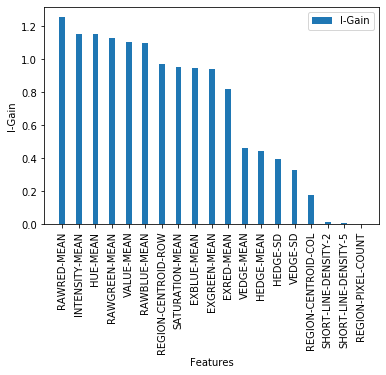

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax.bar(df.index, df["I-Gain"], label='I-Gain',width=.35)
ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax.legend()

plt.show()

## Select *k* Best Features
We rank the features using information gain (well mutual information) and select the _k_ best to build a classifier.  
We iterate through increasing values of *k*.  
`SelectKBest` is a _transform_ that transforms the training data.


In [15]:
acc_scores = []
for kk in range(1, X.shape[1]+1):
    FS_trans = SelectKBest(mutual_info_classif, 
                           k=kk).fit(X_train, y_train)
    X_tR_new = FS_trans.transform(X_train)
    X_tS_new = FS_trans.transform(X_test)
    seg_NB = mnb.fit(X_tR_new, y_train)
    y_dash = seg_NB.predict(X_tS_new)
    acc = accuracy_score(y_test, y_dash)
    acc_scores.append(acc)

df['Accuracy'] = acc_scores
df.head(10)

,I-Gain,Accuracy
RAWRED-MEAN,1.256537,0.553247
INTENSITY-MEAN,1.154883,0.546320
HUE-MEAN,1.154083,0.678788
RAWGREEN-MEAN,1.128537,0.696970
VALUE-MEAN,1.107094,0.679654
RAWBLUE-MEAN,1.101926,0.670996
REGION-CENTROID-ROW,0.970093,0.779221
SATURATION-MEAN,0.953886,0.797403
EXBLUE-MEAN,0.947964,0.795671
EXGREEN-MEAN,0.940391,0.786147


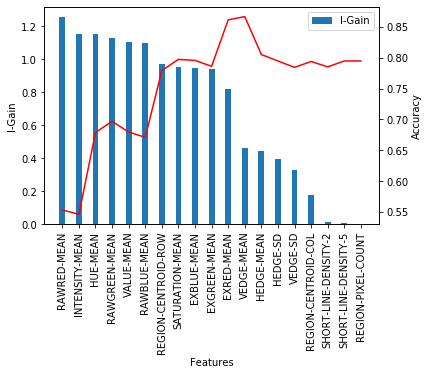

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["I-Gain"], label='I-Gain',width=.35)
ax2.plot(df.index, df["Accuracy"], color='red', label='Accuracy')
ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Accuracy')
ax.legend()

plt.show()

---
## Wrapper
Forward Sequential Search on Image Segmentation data.  
`scikit learn` does not support Wrapper feature selection so we use `MLxtend`.  
http://rasbt.github.io/mlxtend/
So you will probably need to install some libraries:  
`pip install mlxtend`  
`pip install joblib`

In [17]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=4)

seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [18]:
y = seg_data.pop('Class').values
X = seg_data.values
feature_names = seg_data.columns

Run forward sequential wrapper search to select 7 features using 10-fold xval.  

In [19]:
sfs_forward = SFS(knn, 
                  k_features=7, 
                  forward=True, 
                  floating=False, 
                  verbose=1,
                  scoring='accuracy',
                  cv=10, n_jobs = -1)

sfs_forward = sfs_forward.fit(X, y, 
                              custom_feature_names=feature_names)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    2.1s finished
Features: 1/7[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.4s finished
Features: 2/7[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished
Features: 3/7[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished
Features: 4/7[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished
Features: 5/7[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 

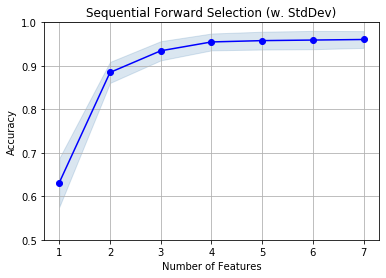

('REGION-CENTROID-ROW', 'VEDGE-MEAN', 'HEDGE-MEAN', 'RAWRED-MEAN', 'EXRED-MEAN', 'EXGREEN-MEAN', 'SATURATION-MEAN')


In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_forward.get_metric_dict(), 
                ylabel='Accuracy',
                kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forward.k_feature_names_)